# Gradient Boosting Trees

### 1) Packages, Laden des Datensatzes

Shape of X: (70000, 784)


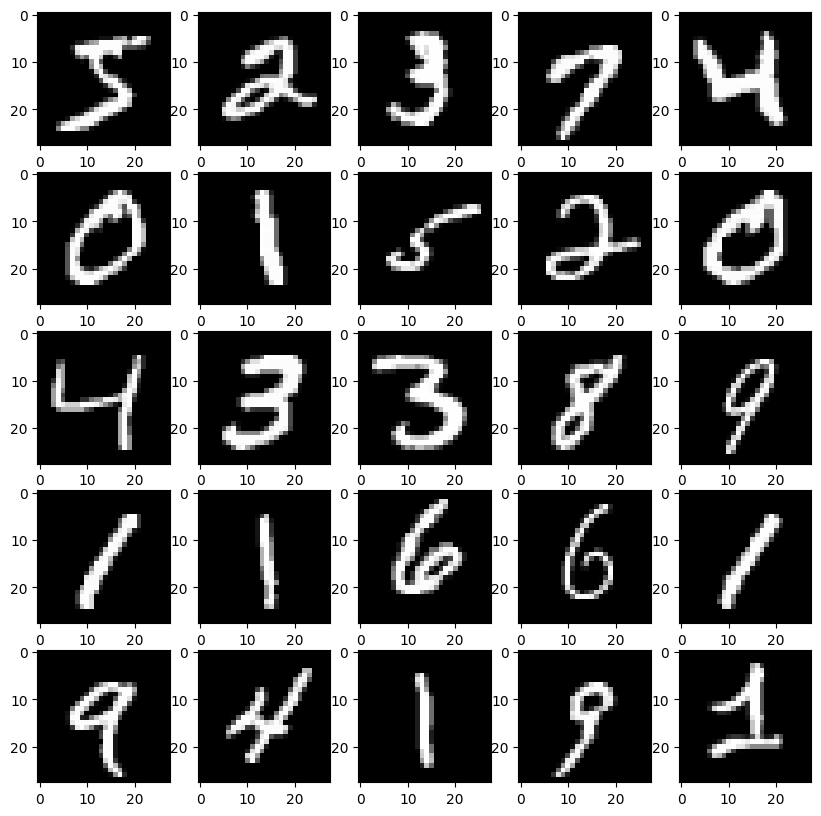

In [8]:
# Darstellung anpassen
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

# Lade benötigte Programmpakete
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import sklearn as sk

from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import GridSearchCV



from sklearn.datasets import fetch_openml # Lade den MNIST_784-Datensatz
mnist=fetch_openml('mnist_784',as_frame=False,parser='auto')

from sklearn.datasets import fetch_openml # Lade den MNIST_784-Datensatz
mnist=fetch_openml('mnist_784',as_frame=False,parser='auto')

X=mnist['data'] # Features, 
y=mnist['target'] # Labels
print(f"Shape of X: {X.shape}")
# Teile in Trainings und Test-Daten. Verwende die ersten 60000 Bilder zum trainieren und die letzten 10000 zum Testen
X_train=X[:60000,:]
y_train=y[:60000]
X_test=X[60000:,:]
y_test=y[60000:]

# Plotte Beispielbilder der Ziffern
fig,ax=plt.subplots(5,5,figsize=(10,10))
for i in range(25):
    j=i%5
    k=i//5

    test_image=X[i].reshape(28,28)
    ax[j,k].imshow(test_image,cmap='gray',vmin=0, vmax=255)



In [9]:
from sklearn.ensemble import GradientBoostingClassifier


## Preprocessing

In [18]:
y_train_binary = (y_train == '5').astype(int)
y_test_binary = (y_test == '5').astype(int)

In [46]:
param_grid = {
    'n_estimators': [80, 90, 100, 110],
    'learning_rate': [0.1],
    'max_depth': [4, 5, 6]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


gbr_model = GradientBoostingClassifier(n_iter_no_change=10, subsample=0.8, random_state=42)

gbr_model_cv = GridSearchCV(gbr_model, param_grid, cv = 5, verbose = 3,scoring = "balanced_accuracy", return_train_score= True, n_jobs=-1)
gbr_model_cv.fit(X_train, y_train_binary)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


KeyboardInterrupt: 

In [43]:
print(f"Beste Parameter für gbr_model: n_estimators = {float(gbr_model_cv.best_params_['n_estimators'])}, learning_rate = {float(gbr_model_cv.best_params_['learning_rate'])}, max_depth = {float(gbr_model_cv.best_params_['max_depth'])}")

Beste Parameter für gbr_model: n_estimators = 100.0, learning_rate = 0.1, max_depth = 5.0


In [44]:
best_model = gbr_model_cv.best_estimator_
y_pred = best_model.predict(X_test)

              precision    recall  f1-score   support

     Nicht-5       0.99      1.00      0.99      9108
           5       0.99      0.88      0.93       892

    accuracy                           0.99     10000
   macro avg       0.99      0.94      0.96     10000
weighted avg       0.99      0.99      0.99     10000



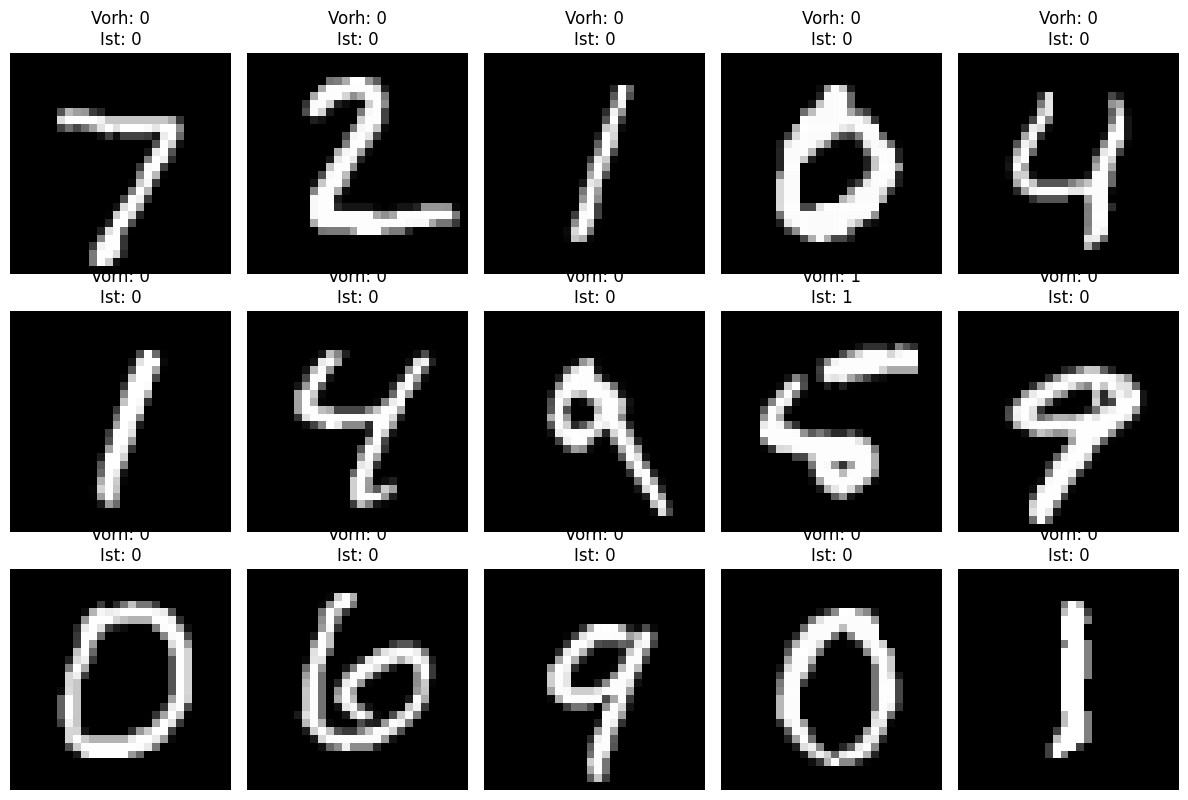

In [45]:
# 3. Vorhersagen & Bewertung
from sklearn.metrics import classification_report
print(classification_report(y_test_binary, y_pred, target_names=["Nicht-5", "5"]))

# 4. Beispielbilder anzeigen
fig, ax = plt.subplots(3, 5, figsize=(12, 8))
for i in range(15):
    image = X_test[i].reshape(28, 28)
    ax[i//5, i%5].imshow(image, cmap='gray')
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title(f"Vorh: {y_pred[i]}\nIst: {y_test_binary[i]}")
plt.tight_layout()
plt.show()

